In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
df_relax     = pd.read_csv("relax.csv").groupby("n")
df_optimized = pd.read_csv("relaxOptimized.csv").groupby("n")
df_openmp    = pd.read_csv("relaxOpenMP.csv").groupby(["n", "threads"])
df_mpi       = pd.read_csv("relaxMPI.csv").groupby(["n", "threads"])

In [65]:
df_relax_mean     = df_relax.mean().reset_index()
df_optimized_mean = df_optimized.mean().reset_index()
df_openmp_mean    = df_openmp.mean().reset_index()
df_mpi_mean       = df_mpi.mean().reset_index()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

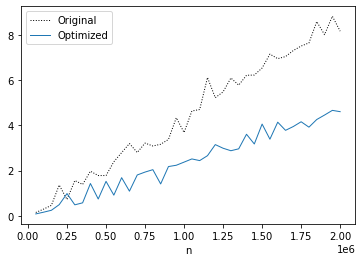

In [67]:
ax = plt.gca()

df_relax_mean.plot(kind="line", x="n", y="duration", label="Original", ax=ax, linewidth=1, color="black", linestyle="dotted")
df_optimized_mean.plot(kind="line", x="n", y="duration", label="Optimized", ax=ax, linewidth=1)

ma = df_optimized.rolling(20, min_periods=1).mean()["duration"]
mstd = df_optimized.rolling(20, min_periods=1).std()["duration"]
plt.fill_between(mstd.index, ma - 2 * mstd, ma + 2 * mstd, color='b', alpha=0.2)

plt.title("Original vs Optimized Performance")
plt.xlabel("Input Size")
plt.ylabel("Duration (s)")

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
#plt.xlim(0, 2000000)
#plt.ylim(0, 10)

plt.show()

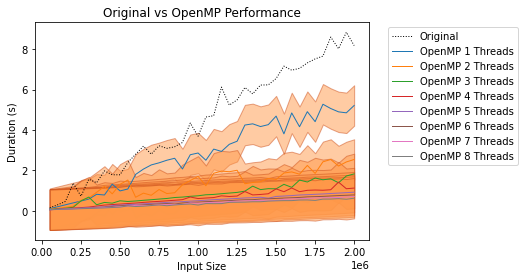

In [38]:
ax = plt.gca()

df_relax_mean.plot(kind="line", x="size", y="duration", label="Original", ax=ax, linewidth=1, color="black", linestyle="dotted")
for name, group in df_openmp_mean.groupby("threads"):
    label = f"OpenMP {name} Threads"
    group.plot(kind="line", x="size", y="duration", label=label, ax=ax, linewidth=1)

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title("Original vs OpenMP Performance")
plt.xlabel("Input Size")
plt.ylabel("Duration (s)")

plt.show()